In [1]:
import csv
import keras
import pandas
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, BatchNormalization, Conv1D, Conv2D, Flatten, MaxPooling1D
from keras import optimizers
import numpy as np
import tensorflow as tf
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
df = pandas.read_csv(url)
inputs = df['cases'].to_numpy()             
outputs = df['deaths'].to_numpy()
df.tail(5)

,date,cases,deaths
228,2020-09-05,6260993,188409
229,2020-09-06,6292054,188815
230,2020-09-07,6317221,189076
231,2020-09-08,6345771,189538
232,2020-09-09,6378972,190714


In [3]:
from matplotlib import pyplot as plt
plt.plot(outputs)
plt.ylabel('deaths')
plt.xlabel('time')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
past = 5
s = (len(inputs) , past  * 2)
betterinputs = np.zeros(s)
betteroutputs = np.zeros(len(inputs))

for i in range(len(inputs) - past):
  temp = np.zeros(past * 2)
  temp[0 : past] = inputs[i : i+ past]
  temp[past:] = outputs[i : i + past] 
  betterinputs[i] = temp
  betteroutputs[i] = outputs[i+past]

In [5]:
betterinputs = betterinputs[0:len(df)-past] 
betteroutputs = betteroutputs[0:len(df)-past]

840.1497797356828


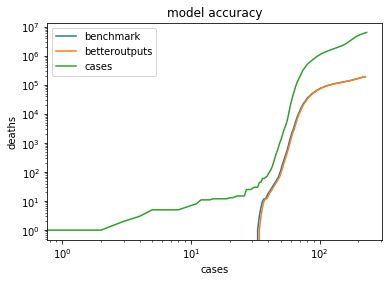

In [6]:
#Creating a benchmark
benchmark = []
for i in range(1, len(betteroutputs)):
   benchmark.append(betteroutputs[i])
sum = 0
for i in range(len(betteroutputs) - 1):
  sum += abs(float(betteroutputs[i]) - float(benchmark[i]))
print(sum / float(len(benchmark)))
plt.semilogy(benchmark, label = "benchmark")
plt.semilogy(betteroutputs , label = "betteroutputs")
plt.semilogx(inputs, label = "cases")
plt.title('model accuracy')
plt.ylabel('deaths')
plt.xlabel('cases')
plt.legend()

In [7]:
split = int(0.85*len(betterinputs))
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
X_train = np.expand_dims(X_train, axis=2)  
X_test = np.expand_dims(X_test, axis=2)

In [8]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(cv=2)
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
model.fit(X_train, y_train)
print("{}".format(np.linalg.norm(model.predict(X_test) - y_test, 1)/len(y_test)))

583.4856241109597


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


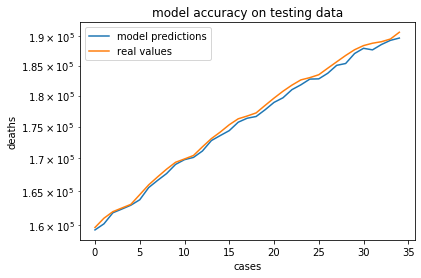

In [9]:
predict = model.predict(X_test)
plt.semilogy(predict, label = "model predictions")
plt.semilogy(y_test , label = "real values")
plt.title('model accuracy on testing data')
plt.ylabel('deaths')
plt.xlabel('cases')
plt.legend()